# PyTorch 深度學習框架基本建模_建立神經網路 - CNN 卷積神經網絡 - MNIST手寫數字辨識

### 參考文件
### https://pytorch.org/
### https://hackmd.io/@Kuo-Li-Chen/SJSdUwv65
### https://learn.microsoft.com/zh-tw/windows/ai/windows-ml/tutorials/pytorch-installation
### https://ithelp.ithome.com.tw/articles/10273722
### https://ithelp.ithome.com.tw/articles/10277163
### https://rowantseng.medium.com/pytorch-%E8%87%AA%E5%AE%9A%E7%BE%A9%E8%B3%87%E6%96%99%E9%9B%86-custom-dataset-7f9958a8ff15
### https://hackmd.io/@gianghoangcotai/Hkfk2AL_L
### https://www.learnpytorch.io/04_pytorch_custom_datasets/
### https://pytorch.org/tutorials/beginner/data_loading_tutorial.html
### https://www.pytorchmaster.com/1-2%2C%E5%9B%BE%E7%89%87%E6%95%B0%E6%8D%AE%E5%BB%BA%E6%A8%A1%E6%B5%81%E7%A8%8B%E8%8C%83%E4%BE%8B/
### https://www.cnblogs.com/chenhuabin/p/17026018.html
### https://medium.com/ching-i/pytorch-%E5%9F%BA%E6%9C%AC%E4%BB%8B%E7%B4%B9%E8%88%87%E6%95%99%E5%AD%B8-ac0e1ebfd7ec
### https://datawhalechina.github.io/thorough-pytorch/%E7%AC%AC%E4%BA%94%E7%AB%A0/5.1%20PyTorch%E6%A8%A1%E5%9E%8B%E5%AE%9A%E4%B9%89%E7%9A%84%E6%96%B9%E5%BC%8F.html
### https://datawhalechina.github.io/thorough-pytorch/%E7%AC%AC%E4%B8%89%E7%AB%A0/3.1%20%E6%80%9D%E8%80%83%EF%BC%9A%E5%AE%8C%E6%88%90%E6%B7%B1%E5%BA%A6%E5%AD%A6%E4%B9%A0%E7%9A%84%E5%BF%85%E8%A6%81%E9%83%A8%E5%88%86.html
### https://datawhalechina.github.io/thorough-pytorch/%E7%AC%AC%E4%B8%89%E7%AB%A0/3.4%20%E6%A8%A1%E5%9E%8B%E6%9E%84%E5%BB%BA.html
### https://pytorch-cn.readthedocs.io/zh/latest/package_references/torch-nn/#_1
### https://blog.51cto.com/u_11299290/4685776
### https://wizardforcel.gitbooks.io/learn-dl-with-pytorch-liaoxingyu/content/5.1.html
### https://ithelp.ithome.com.tw/articles/10279986?sc=iThomeR
### https://hackmd.io/@lido2370/SJMPbNnKN?type=view
### https://github.com/maticvl/dataHacker
### https://github.com/XavierJiezou/pytorch-cnn-mnist


## training a deep learning model with PyTorch 
### Trainer is the training procedure, which takes a model and training data from the data loader, and carries out training and evaluation steps required to train our model
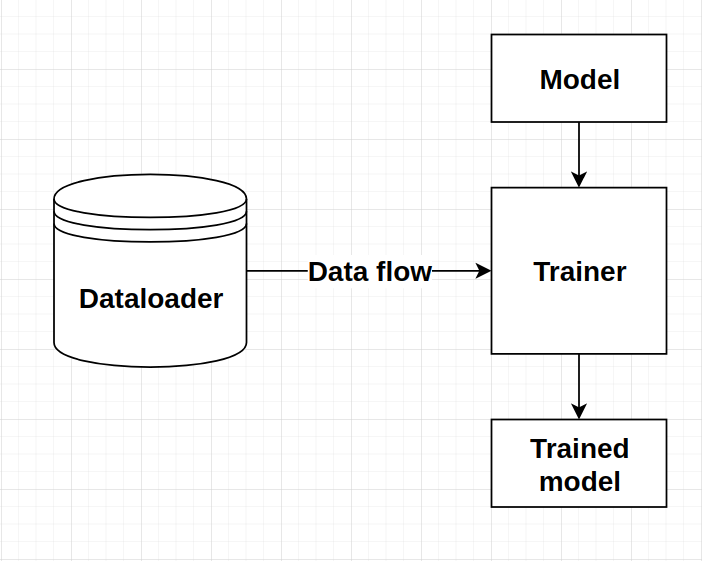

## Forward and backward propagation in training neural networks
<img src="https://machinelearningknowledge.ai/wp-content/uploads/2019/10/Backpropagation.gif" width="550px">


## 建立神經網路
### 使用Pytorch通常有三種方式構建模型：使用nn.Sequential按層順序構建模型，繼承nn.Module基類構建自定義模型，繼承nn.Module基類構建模型並輔助應用模型容器(nn.Sequential,nn.ModuleList,nn.ModuleDict)進行封裝。
### Module 類是 torch.nn 模塊里提供的一個模型構造類 (nn.Module)，是所有神經⽹網絡模塊的基類，可以繼承它來定義我們想要的模型；
### PyTorch模型定義應包括兩個主要部分：各個部分的初始化（__init__）；數據流向定義（forward）
### 基於nn.Module，我們可以通過Sequential，ModuleList和ModuleDict三種方式定義PyTorch模型。
### PyTorch中神經網絡構造一般是基於nn.Module類的模型來完成的
### Module類是 torch.nn 模塊里提供的一個模型構造類，是所有神經網絡模塊的基類，我們可以繼承它來定義我們想要的模型。

### 建構一個多層感知機(MLP)模型範例
#### 繼承Module 類構造多層感知機。這里定義的MLP 類重載了 Module 類的 __init__ 函數和 forward 函數。它們分別用於創建模型參數和定義前向計算（正向傳播）。下面的MLP 類定義了一個具有兩個隱藏層的多層感知機。
#### 系統將通過⾃動求梯度⽽自動⽣成反向傳播所需的 backward 函數。
#### 我們可以實例化 MLP 類得到模型變量net。下⾯的代碼初始化 net 並傳入輸⼊數據 X 做一次前向計算。其中，net(X)會調用 MLP 繼承⾃自 Module 類的 __call__ 函數，這個函數將調⽤用 MLP 類定義的forward 函數來完成前向計算。因此我們自己構造模型時需要明確定義模型的forward過程

In [1]:
import os 
import numpy as np 
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.optim as optimizer

In [4]:
import torch
from torch import nn

class MLP(nn.Module):
  # 声明带有模型参数的层，这里声明了两个全连接层
  def __init__(self, **kwargs):
    # 调用MLP父类Block的构造函数来进行必要的初始化。这样在构造实例时还可以指定其他函数
    super(MLP, self).__init__(**kwargs)
    self.hidden = nn.Linear(784, 256)
    self.act = nn.ReLU()
    self.output = nn.Linear(256,10)
    
   # 定义模型的前向计算，即如何根据输入x计算返回所需要的模型输出
  def forward(self, x):
    o = self.act(self.hidden(x))
    return self.output(o)   

In [5]:
X = torch.rand(2,784) # 设置一个随机的输入张量
net = MLP() # 实例化模型
print(net) # 打印模型
net(X) # 前向计算

MLP(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (act): ReLU()
  (output): Linear(in_features=256, out_features=10, bias=True)
)


tensor([[ 0.1292,  0.0193, -0.1007,  0.0031, -0.1055,  0.2220, -0.1336,  0.0595,
          0.0207,  0.0972],
        [ 0.1352, -0.0012,  0.0324,  0.0974,  0.0396,  0.1440, -0.1547, -0.0143,
         -0.1314, -0.0418]], grad_fn=<AddmmBackward0>)

## torch.nn 模塊里提供的常見的層
### 卷積層 torch.nn.Conv2d
### 池化層 torch.nn.MaxPool2d, nn.AvgPool2d
### 線性層(全連接層) torch.nn.Linear
### 循環神經網絡層 torch.nn.RNN
### LSTM (Long Short-Term Memory) torch.nn.LSTM

## torch.nn 模塊里提供的常見的激活函數: nn.Sigmoid, nn.ReLU
## torch.nn 模塊里提供的常見的損失函數: nn.CrossEntropyLoss, nn.MSELoss
## torch.autograd：自動梯度计算

# PyTorch - CNN 卷積神經網絡 - MNIST手寫數字辨識實作
### 請回想比較之前 TensorFlow 的建模步驟
## 1. install scikit-learn

In [10]:
!pip install -U scikit-learn

  Using cached scikit_learn-1.2.2-cp39-cp39-win_amd64.whl (8.4 MB)
  Using cached scipy-1.10.1-cp39-cp39-win_amd64.whl (42.5 MB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)


## 2.Keras 框架搭建安装,在CMD命令行或者Powershell中输入,先行安裝tensorflow

### ==>pip install --upgrade tensorflow
### (會一併安裝Keras )
### 之后可以验证keras是否安装成功,在命令行中输入Python命令进入Python变成命令行环境：>>> import keras
### 若有問題==>pip install keras -U --pre


## 3.  Import   及讀入資料預處理

In [55]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [56]:
from keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [57]:
#normalization
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [58]:

#接著將data 通通轉成 torch 的 tensor 形式，後面丟進 Dataset 需要符合 torch 的 tensor 形式。
featuresTrain = torch.from_numpy(X_train)
targetsTrain = torch.from_numpy(Y_train) 

featuresTest = torch.from_numpy(X_test)
targetsTest = torch.from_numpy(Y_test) 

In [59]:
#TensorDataset 可以用来对 tensor 进行打包，就好像 python 中的 zip 功能。该类通过每一个 tensor 的第一个维度进行索引。
#因此，该类中的 tensor 第一维度必须相等. 另外：TensorDataset 中的参数必须是 tensor
# Pytorch train and test TensorDataset,標籤對應data 
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

## 4.超參數設定

In [60]:
# Hyper Parameters
# batch_size, epoch and iteration
LR = 0.01
batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(X_train) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

16


## 5. DataLoader

In [61]:
# Pytorch DataLoader
train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = True)

## 6.建立 CNN model

In [62]:
# Create CNN Model
class CNN_Model(nn.Module):
    def __init__(self):
        super(CNN_Model, self).__init__()
        # Convolution 1 , input_shape=(1,28,28)
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=0) #output_shape=(16,24,24)
        self.relu1 = nn.ReLU() # activation
        # Max pool 1
        self.maxpool1 = nn.MaxPool2d(kernel_size=2) #output_shape=(16,12,12)
        # Convolution 2
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=0) #output_shape=(32,8,8)
        self.relu2 = nn.ReLU() # activation
        # Max pool 2
        self.maxpool2 = nn.MaxPool2d(kernel_size=2) #output_shape=(32,4,4)
        # Fully connected 1 ,#input_shape=(32*4*4)
        self.fc1 = nn.Linear(32 * 4 * 4, 10) 
    
    def forward(self, x):
        # Convolution 1
        out = self.cnn1(x)
        out = self.relu1(out)
        # Max pool 1
        out = self.maxpool1(out)
        # Convolution 2 
        out = self.cnn2(out)
        out = self.relu2(out)
        # Max pool 2 
        out = self.maxpool2(out)
        out = out.view(out.size(0), -1)
        # Linear function (readout)
        out = self.fc1(out)
        return out

model = CNN_Model()
print(model)

CNN_Model(
  (cnn1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (relu1): ReLU()
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (relu2): ReLU()
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=512, out_features=10, bias=True)
)


##  7.訓練模型
### 訓練模型前，需先定義 model, loss_func, optimizer, input_shape, num_epochs, train_loader, test_loader 這些參數。
### 選優化器: Adam()，決定 loss function : CrossEntropyLoss()

In [63]:
optimizer = torch.optim.Adam(model.parameters(), lr=LR)   # optimize all cnn parameters
loss_func = nn.CrossEntropyLoss()   # the target label is not one-hotted
input_shape = (-1,1,28,28)

In [64]:
def fit_model(model, loss_func, optimizer, input_shape, num_epochs, train_loader, test_loader):
    # Traning the Model
    #history-like list for store loss & acc value
    training_loss = []
    training_accuracy = []
    validation_loss = []
    validation_accuracy = []
    for epoch in range(num_epochs):
        #training model & store loss & acc / epoch
        correct_train = 0
        total_train = 0
        for i, (images, labels) in enumerate(train_loader):
            # 1.Define variables
            train = Variable(images.view(input_shape))
            labels = Variable(labels)
            # 2.Clear gradients
            optimizer.zero_grad()
            # 3.Forward propagation
            outputs = model(train)
            # 4.Calculate softmax and cross entropy loss
            train_loss = loss_func(outputs, labels)
            # 5.Calculate gradients
            train_loss.backward()
            # 6.Update parameters
            optimizer.step()
            # 7.Get predictions from the maximum value
            predicted = torch.max(outputs.data, 1)[1]
            # 8.Total number of labels
            total_train += len(labels)
            # 9.Total correct predictions
            correct_train += (predicted == labels).float().sum()
        #10.store val_acc / epoch
        train_accuracy = 100 * correct_train / float(total_train)
        training_accuracy.append(train_accuracy)
        # 11.store loss / epoch
        training_loss.append(train_loss.data)

        #evaluate model & store loss & acc / epoch
        correct_test = 0
        total_test = 0
        for images, labels in test_loader:
            # 1.Define variables
            test = Variable(images.view(input_shape))
            # 2.Forward propagation
            outputs = model(test)
            # 3.Calculate softmax and cross entropy loss
            val_loss = loss_func(outputs, labels)
            # 4.Get predictions from the maximum value
            predicted = torch.max(outputs.data, 1)[1]
            # 5.Total number of labels
            total_test += len(labels)
            # 6.Total correct predictions
            correct_test += (predicted == labels).float().sum()
        #6.store val_acc / epoch
        val_accuracy = 100 * correct_test / float(total_test)
        validation_accuracy.append(val_accuracy)
        # 11.store val_loss / epoch
        validation_loss.append(val_loss.data)
        print('Train Epoch: {}/{} Traing_Loss: {} Traing_acc: {:.6f}% Val_Loss: {} Val_accuracy: {:.6f}%'.format(epoch+1, num_epochs, train_loss.data, train_accuracy, val_loss.data, val_accuracy))
    return training_loss, training_accuracy, validation_loss, validation_accuracy

### 執行訓練

In [65]:
training_loss, training_accuracy, validation_loss, validation_accuracy = fit_model(model, loss_func, optimizer, input_shape, num_epochs, train_loader, test_loader)

Train Epoch: 1/16 Traing_Loss: 0.19807088375091553 Traing_acc: 95.686668% Val_Loss: 0.03861972689628601 Val_accuracy: 98.160004%
Train Epoch: 2/16 Traing_Loss: 0.1640958935022354 Traing_acc: 98.330002% Val_Loss: 0.07279997318983078 Val_accuracy: 98.459999%
Train Epoch: 3/16 Traing_Loss: 0.021349530667066574 Traing_acc: 98.571663% Val_Loss: 0.015798073261976242 Val_accuracy: 98.760002%
Train Epoch: 4/16 Traing_Loss: 0.007682647090405226 Traing_acc: 98.665001% Val_Loss: 0.017507584765553474 Val_accuracy: 98.239998%
Train Epoch: 5/16 Traing_Loss: 0.004978458397090435 Traing_acc: 98.801666% Val_Loss: 0.007240341976284981 Val_accuracy: 98.730003%
Train Epoch: 6/16 Traing_Loss: 0.026040418073534966 Traing_acc: 98.818336% Val_Loss: 0.06301859766244888 Val_accuracy: 98.620003%
Train Epoch: 7/16 Traing_Loss: 0.0001761498861014843 Traing_acc: 98.839996% Val_Loss: 0.12081129103899002 Val_accuracy: 98.570000%
Train Epoch: 8/16 Traing_Loss: 0.013082816265523434 Traing_acc: 98.898331% Val_Loss: 0.11

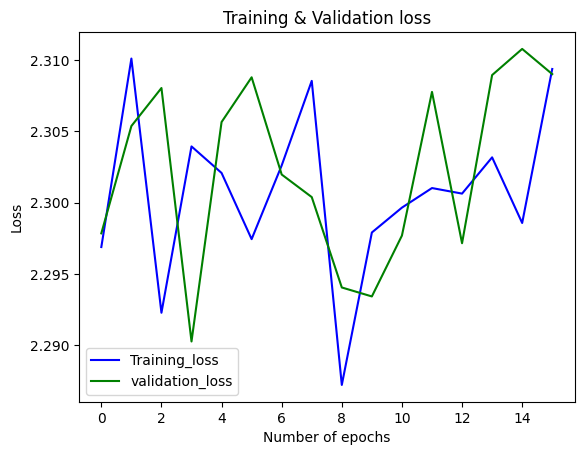

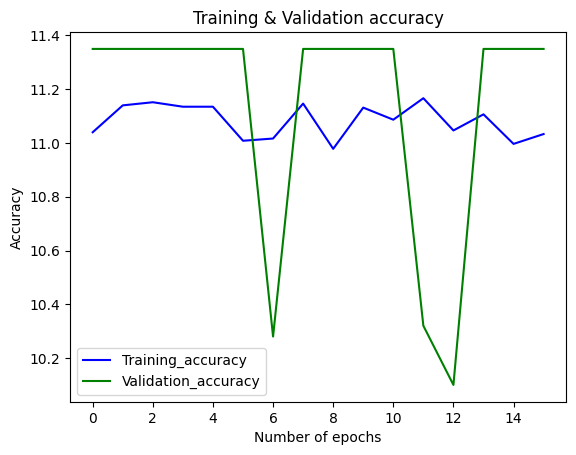

In [36]:
# visualization
plt.plot(range(num_epochs), training_loss, 'b-', label='Training_loss')
plt.plot(range(num_epochs), validation_loss, 'g-', label='validation_loss')
plt.title('Training & Validation loss')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.plot(range(num_epochs), training_accuracy, 'b-', label='Training_accuracy')
plt.plot(range(num_epochs), validation_accuracy, 'g-', label='Validation_accuracy')
plt.title('Training & Validation accuracy')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [69]:
# Save the model checkpoint
torch.save(model.state_dict(), 'testcnnModel.ckpt')